# migracion de data set de csv a arff realizada con weka
weka > explorer > open file > diabetes.csv > save > diabetes.arff
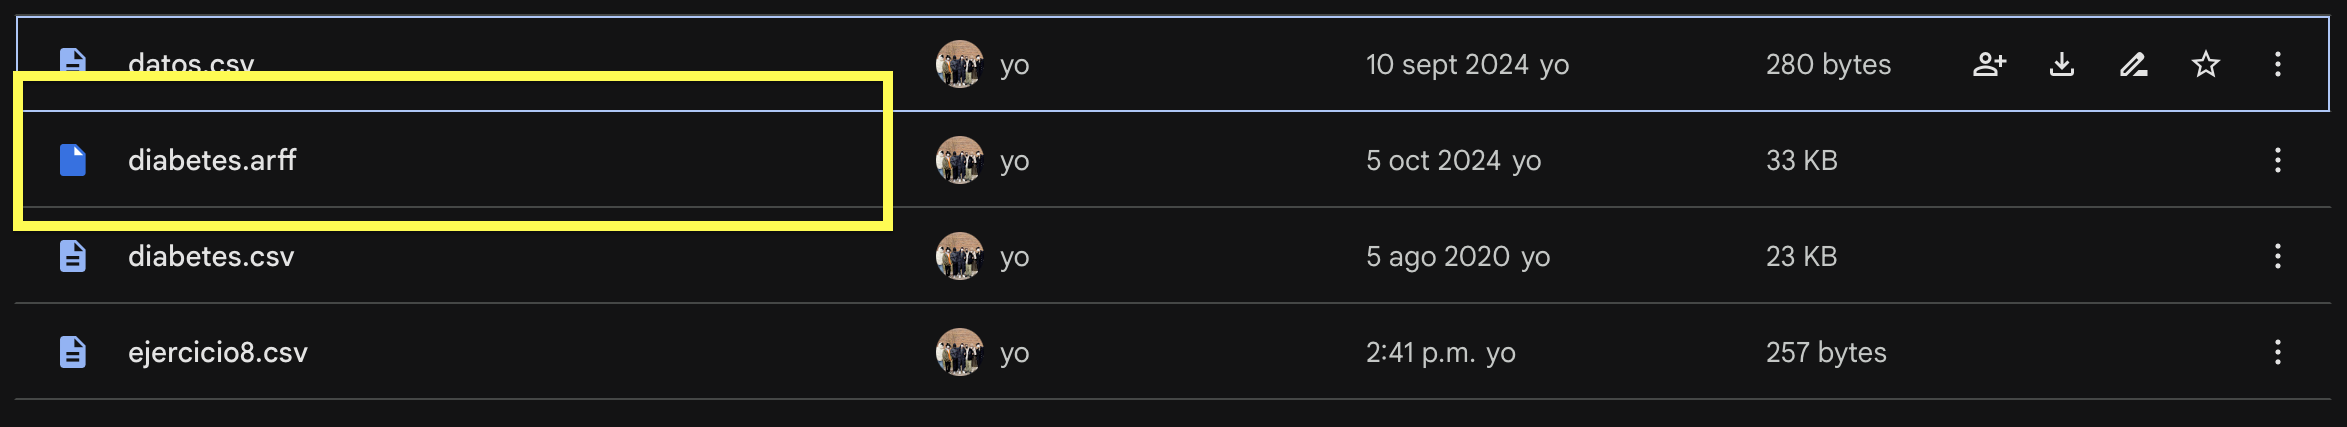

In [ ]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


No requieren Label Encoding ni One-Hot Encoding a menos que las transformes en categóricas.

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/content/Drive/MyDrive/datos/diabetes.csv')

# Definir el mapeo
glucose_mapping = {
    'High': 0,
    'Normal': 1,
    'Very High': 2
}

# Aplicar el mapeo
df['Outcome'] = df['Outcome'].map(glucose_mapping)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      NaN  
1                     0.351   31      NaN  
2                     0.672   32      NaN  
3                     0.167   21      NaN  
4                     2.288   33      NaN  


DISCRETIZACION

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/content/Drive/MyDrive/datos/diabetes.csv')

# Función para discretizar la edad
def discretize_age(age):
    if age < 30:
        return '<30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    else:
        return '50+'

# Aplicar discretización a 'Age'
df['Age Discretized'] = df['Age'].apply(discretize_age)

# Función para discretizar la glucosa
def discretize_glucose(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 140:
        return 'High'
    else:
        return 'Very High'

# Aplicar discretización a 'Glucose'
df['Glucose Discretized'] = df['Glucose'].apply(discretize_glucose)

print(df[['Age', 'Age Discretized', 'Glucose', 'Glucose Discretized']].head())


   Age Age Discretized  Glucose Glucose Discretized
0   50             50+      148           Very High
1   31           30-40       85              Normal
2   32           30-40      183           Very High
3   21             <30       89              Normal
4   33           30-40      137                High


AHORA SI APLICAMOS LABELENCODER

In [ ]:
# Definir mapeo para 'Age Discretized'
age_mapping = {
    '<30': 0,
    '30-40': 1,
    '40-50': 2,
    '50+': 3
}
df['Age Encoded'] = df['Age Discretized'].map(age_mapping)

# Definir mapeo para 'Glucose Discretized'
glucose_mapping = {
    'Normal': 0,
    'High': 1,
    'Very High': 2
}
df['Glucose Encoded'] = df['Glucose Discretized'].map(glucose_mapping)

print(df[['Age Discretized', 'Age Encoded', 'Glucose Discretized', 'Glucose Encoded']].head())


  Age Discretized  Age Encoded Glucose Discretized  Glucose Encoded
0             50+            3           Very High                2
1           30-40            1              Normal                0
2           30-40            1           Very High                2
3             <30            0              Normal                0
4           30-40            1                High                1


One-Hot Encoding Manualmente

In [ ]:
# One-Hot Encoding para 'Age Discretized'
age_categories = df['Age Discretized'].unique()
for category in age_categories:
    df[f'Age_{category}'] = df['Age Discretized'].apply(lambda x: 1 if x == category else 0)

# One-Hot Encoding para 'Glucose Discretized'
glucose_categories = df['Glucose Discretized'].unique()
for category in glucose_categories:
    df[f'Glucose_{category}'] = df['Glucose Discretized'].apply(lambda x: 1 if x == category else 0)

# Opcional: Eliminar las columnas originales discretizadas
df.drop(['Age Discretized', 'Glucose Discretized'], axis=1, inplace=True)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Age Encoded  Glucose Encoded  \
0                     0.627   50        1            3                2   
1                     0.351   31        0            1                0   
2                     0.672   32        1            1                2   
3                     0.167   21        0            0                0   
4                     2.288   33        1            1                1   

   Age_50+  Age_30-40  Age_<30  Age_40-50  Glucose_Very High  Glucose_Normal  \
0        1          0        0      

NORMALIZACION MANUALMENTE

In [ ]:
# Función de normalización Min-Max
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Columnas a normalizar
columns_to_normalize = ['Glucose', 'Insulin', 'BMI', 'Age']

for col in columns_to_normalize:
    df[f'{col}_Normalized'] = min_max_normalize(df[col])

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Age Encoded  ...  Age_30-40  \
0                     0.627   50        1            3  ...          0   
1                     0.351   31        0            1  ...          1   
2                     0.672   32        1            1  ...          1   
3                     0.167   21        0            0  ...          0   
4                     2.288   33        1            1  ...          1   

   Age_<30  Age_40-50  Glucose_Very High  Glucose_Normal  Glucose_High  \
0        0          0                  1        